<a href="https://colab.research.google.com/github/abdullah9975/DAY-88/blob/main/Space_Missions_Analysis_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install iso3166


In [ ]:
%pip install --upgrade plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 55.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from iso3166 import countries
from datetime import datetime, timedelta

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format


In [ ]:
df_data = pd.read_csv('mission_launches.csv')


In [ ]:
df_data.shape

(4324, 9)

In [ ]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
df_data.isna().any()

Unnamed: 0.1      False
Unnamed: 0        False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

In [ ]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [ ]:
df_data.isnull()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4319,False,False,False,False,False,False,False,True,False
4320,False,False,False,False,False,False,False,True,False
4321,False,False,False,False,False,False,False,True,False
4322,False,False,False,False,False,False,False,True,False


In [ ]:
df_data.isnull().head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [ ]:
df_data.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
df_data.isnull().sum()

Unnamed: 0.1         0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [ ]:
df_data.duplicated().sum()

0

In [ ]:
clean_df = df_data.dropna()

In [ ]:
clean_df.isna().sum()

Unnamed: 0.1      0
Organisation      0
Location          0
Date              0
Detail            0
Rocket_Status     0
Price             0
Mission_Status    0
dtype: int64

In [ ]:
clean_df.shape

(964, 8)

In [ ]:
no_of_launches_per_company = clean_df['Organisation'].value_counts()
no_of_launches_per_company

Organisation
CASC               158
NASA               149
SpaceX              99
ULA                 98
Arianespace         96
Northrop            83
ISRO                67
MHI                 37
VKS RF              33
US Air Force        26
Roscosmos           23
Kosmotras           22
ILS                 13
Eurockot            13
Rocket Lab          13
Martin Marietta      9
Lockheed             8
Boeing               7
JAXA                 3
RVSN USSR            2
Sandia               1
Virgin Orbit         1
ESA                  1
ExPace               1
EER                  1
Name: count, dtype: int64

In [ ]:
no_of_launches_per_company = df_data['Organisation'].value_counts().reset_index()
no_of_launches_per_company.columns = ['Organisation', 'Launches']


In [ ]:
no_of_launches_per_company.head()

,Organisation,Launches
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203


In [ ]:
# Create a bar chart
fig = px.bar(no_of_launches_per_company, x='Organisation', y='Launches',
             title='Number of Space Mission Launches by Organisation',
             labels={'Launches': 'Number of Launches', 'Organisation': 'Organisation'},
             color='Organisation')


In [ ]:

# Update layout
fig.update_layout(xaxis={'categoryorder': 'total ascending'})


In [ ]:
launches_by_organization = clean_df.groupby('Organisation').size().sort_values()


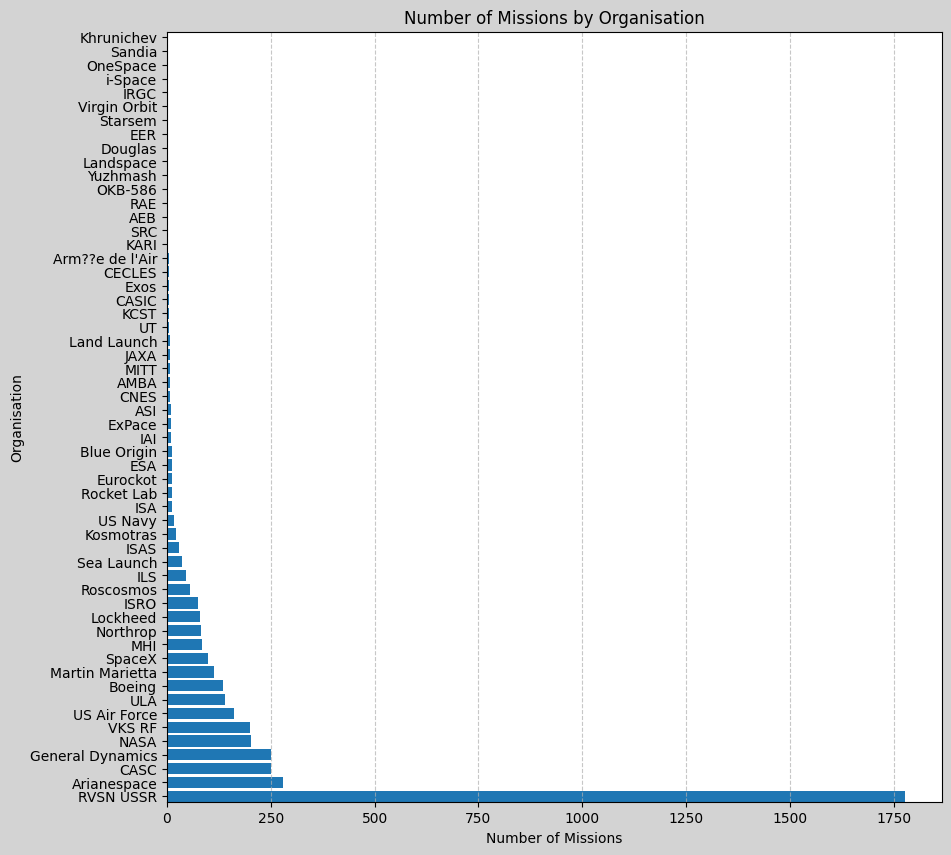

In [ ]:
plt.figure(figsize=(10, 10), facecolor='lightgray')
plt.barh(no_of_launches_per_company.Organisation, no_of_launches_per_company.Launches)
plt.xlabel('Number of Missions')
plt.ylabel('Organisation')
plt.title('Number of Missions by Organisation')
plt.margins(y=0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
clean_df.tail()

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success
4020,4020,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Tue Sep 01, 1964 15:00 UTC",Titan IIIA | Transtage 1,StatusRetired,63.23,Failure


In [ ]:
# EITHER THIS WAY
# 3-How many rockets are active compared to those that are decomissioned?

number_of_active_rockets = clean_df[clean_df['Rocket_Status'] == 'StatusActive']
len(number_of_active_rockets)

586

In [ ]:
#OR THIS WAY
# 3-How many rockets are active compared to those that are decomissioned?

active_rockets_df = clean_df.query("Rocket_Status == 'StatusActive'")
len(active_rockets_df)

586

In [ ]:
# 4-How many missions were successful?
succeful_missions = clean_df[clean_df['Mission_Status'] == 'Success']
len(succeful_missions)

910

In [ ]:
# 4-How many missions failed?
failed_missions = clean_df[clean_df['Mission_Status'] == 'Failure']
len(failed_missions)

36

In [ ]:
# Assuming df_data is your DataFrame
clean_df['Price'] = pd.to_numeric(clean_df['Price'], errors='coerce')

<ipython-input-32-16d2be410adc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# 5-How Expensive are the Launches?
price_of_launches = clean_df['Price']
price_of_launches

0       50.00
1       29.75
3       65.00
4      145.00
5       64.68
        ...  
3855    59.00
3971    63.23
3993    63.23
4000    63.23
4020    63.23
Name: Price, Length: 964, dtype: float64

In [ ]:
price_of_launches.dtype

dtype('float64')

In [ ]:
price_of_launches = pd.to_numeric(price_of_launches, errors='coerce')

In [ ]:
price_of_launches.mean()

129.79523709167546

In [ ]:
price_of_launches.isnull().count()

964

In [ ]:
cleaned_missing_values = price_of_launches.dropna()

In [ ]:
cleaned_missing_values

0       50.00
1       29.75
3       65.00
4      145.00
5       64.68
        ...  
3855    59.00
3971    63.23
3993    63.23
4000    63.23
4020    63.23
Name: Price, Length: 949, dtype: float64

In [ ]:
launches_by_organization = df_data.groupby('Organisation').size().sort_values()


Text(0.5, 1.0, 'Distribution of Price')

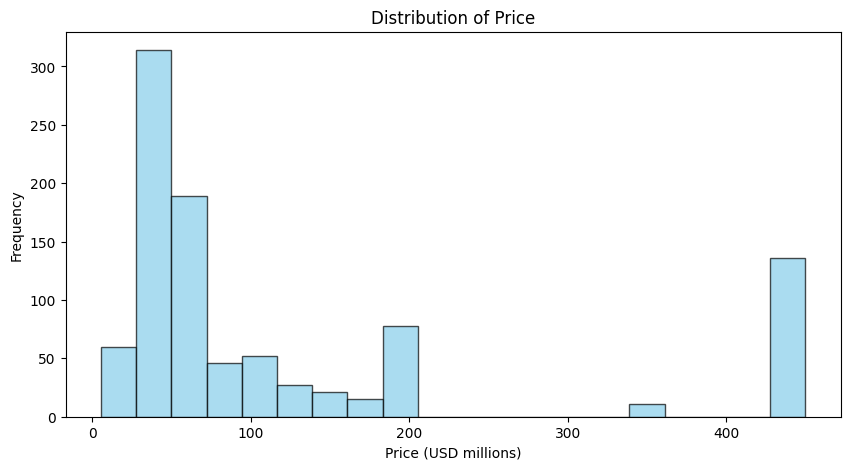

In [ ]:
# 5-Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

# Create histogram
plt.figure(figsize=(10, 5))
plt.hist(cleaned_missing_values, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Price (USD millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

# Show plot
# plt.grid(True)

Text(0.5, 1.0, 'Distribution of Price')

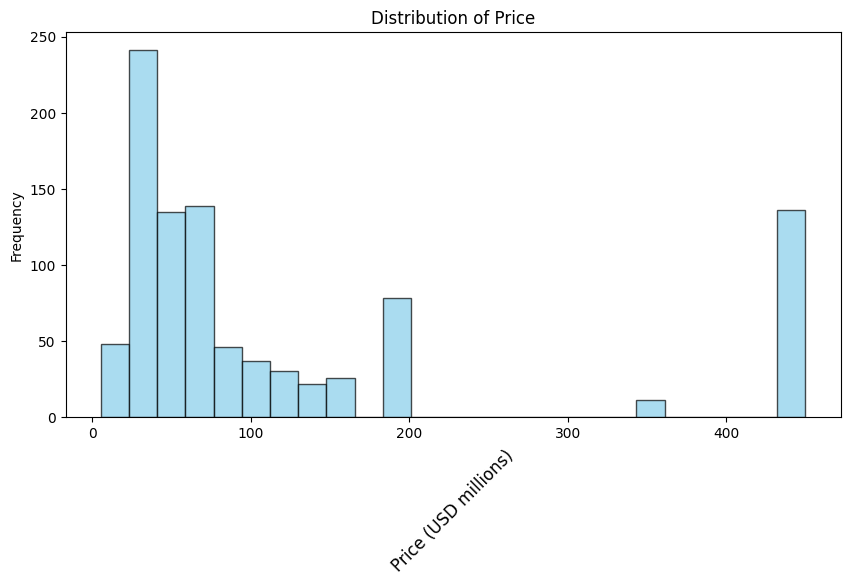

In [ ]:
# 5-Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

# Create histogram
plt.figure(figsize=(10, 5))
plt.hist(price_of_launches, bins=25, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Price (USD millions)', fontsize=12, rotation=45)
plt.ylabel('Frequency')
plt.title('Distribution of Price')

# Show plot
# plt.grid(True)

In [ ]:
df_data['Country'] = df_data['Location'].str.split(', ').str[-1]
update = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA',
    'Marshall Islands': 'USA',
    'Iran': 'Iran, Islamic Republic of',
    'North Korea': "Korea, Democratic People's Republic of",
    'South Korea': "Korea, Republic of",
    'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
    'Pacific Ocean': 'USA'
}
df_data['Country'] = df_data['Country'].replace(update)
df_data['Country Code'] = df_data['Country'].apply(lambda x: (countries.get(x).alpha3))
launches_by_country = df_data.groupby(['Country', 'Country Code']).size().reset_index(name='Launch Count')

In [ ]:
# Use a Choropleth Map to Show the Number of Launches by Country
# Group by country and count launches
# launches_by_country = df_data.groupby('Location').size().reset_index(name='Launches')

# Create choropleth map
fig = px.choropleth(
    launches_by_country,
    locations='Country Code',
    # locationmode='country names',
    color='Launch Count',
    color_continuous_scale='twilight',
    hover_name= 'Country',
    title='Number of Launches by Country'
    )

# Show the map
fig.show()

In [ ]:
# # Use a Choropleth Map to Show the Number of Launches by Country

# # Load the data
# df_data = pd.read_csv('mission_launches.csv')

# # Group by country and count launches
# launches_by_country = df_data.groupby('Location').size().reset_index(name='Launches')

# # Create choropleth map
# fig = px.choropleth(launches_by_country,
#                     locations='Location', # Use the correct column name
#                     locationmode='country names',
#                     color='Launches',
#                     color_continuous_scale="twilight",
#                     range_color=(0, 50),
#                     hover_name='Location',
#                     hover_data=['Launches'],
#                     title='Number of Launches by Country')
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# fig

In [ ]:
   color_names_for_above_map=['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
             'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
             'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
             'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
             'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
             'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd']

In [ ]:
df_data['Location']

0              LC-39A, Kennedy Space Center, Florida, USA
1       Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...
2                           Pad A, Boca Chica, Texas, USA
3            Site 200/39, Baikonur Cosmodrome, Kazakhstan
4                SLC-41, Cape Canaveral AFS, Florida, USA
                              ...                        
4319             LC-18A, Cape Canaveral AFS, Florida, USA
4320             LC-26A, Cape Canaveral AFS, Florida, USA
4321             LC-18A, Cape Canaveral AFS, Florida, USA
4322            Site 1/5, Baikonur Cosmodrome, Kazakhstan
4323            Site 1/5, Baikonur Cosmodrome, Kazakhstan
Name: Location, Length: 4324, dtype: object

In [ ]:
# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.
df_data.head()
fig = px.sunburst(df_data, path=["Location", "Organisation", "Mission_Status"])
fig

In [ ]:
fig = px.sunburst(df_data, path=["Country Code", "Organisation", "Mission_Status"])
fig

In [ ]:
money_spent_by_organization = clean_df.dropna().groupby('Organisation')['Price'].sum().sort_values(ascending=False)
money_spent_by_organization.drop_duplicates()

Organisation
NASA              61,200.00
Arianespace       16,345.00
ULA               14,798.00
CASC               6,340.26
SpaceX             5,444.00
Northrop           3,930.00
MHI                3,532.50
ISRO               2,177.00
US Air Force       1,550.92
VKS RF             1,548.90
ILS                1,320.00
Boeing             1,241.00
Roscosmos          1,187.50
Martin Marietta      721.40
Kosmotras            638.00
Eurockot             543.40
Lockheed             280.00
JAXA                 168.00
Rocket Lab            97.50
ESA                   37.00
ExPace                28.30
EER                   20.00
Sandia                15.00
Virgin Orbit          12.00
Name: Price, dtype: float64

In [ ]:
money_spent_by_organization_per_launch = pd.concat([money_spent_by_organization, launches_by_organization], axis=1).reset_index()
money_spent_by_organization_per_launch.columns = ['Organisation', 'Money Spent', 'Launch Count']
money_spent_by_organization_per_launch['Money per Launch'] = money_spent_by_organization_per_launch['Money Spent'] / money_spent_by_organization_per_launch['Launch Count']
money_spent_by_organization_per_launch = money_spent_by_organization_per_launch.sort_values('Money per Launch', ascending=False).dropna()

In [ ]:
money_spent_by_organization_per_launch

,Organisation,Money Spent,Launch Count,Money per Launch
0,NASA,"61,200.00",203,301.48
2,ULA,"14,798.00",140,105.70
1,Arianespace,"16,345.00",279,58.58
4,SpaceX,"5,444.00",100,54.44
5,Northrop,"3,930.00",83,47.35
6,MHI,"3,532.50",84,42.05
15,Eurockot,543.40,13,41.80
14,Kosmotras,638.00,22,29.00
10,ILS,"1,320.00",46,28.70
7,ISRO,"2,177.00",76,28.64


In [ ]:
df_data['Date'] = pd.to_datetime(df_data['Date'], format="mixed")

In [ ]:
# Convert the 'Date' column to datetime type and make it timezone-naive
df_data['Date'] = pd.to_datetime(df_data['Date'], utc=True).dt.tz_localize(None)

launches_per_year = df_data.groupby(df_data['Date'].dt.year).size()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

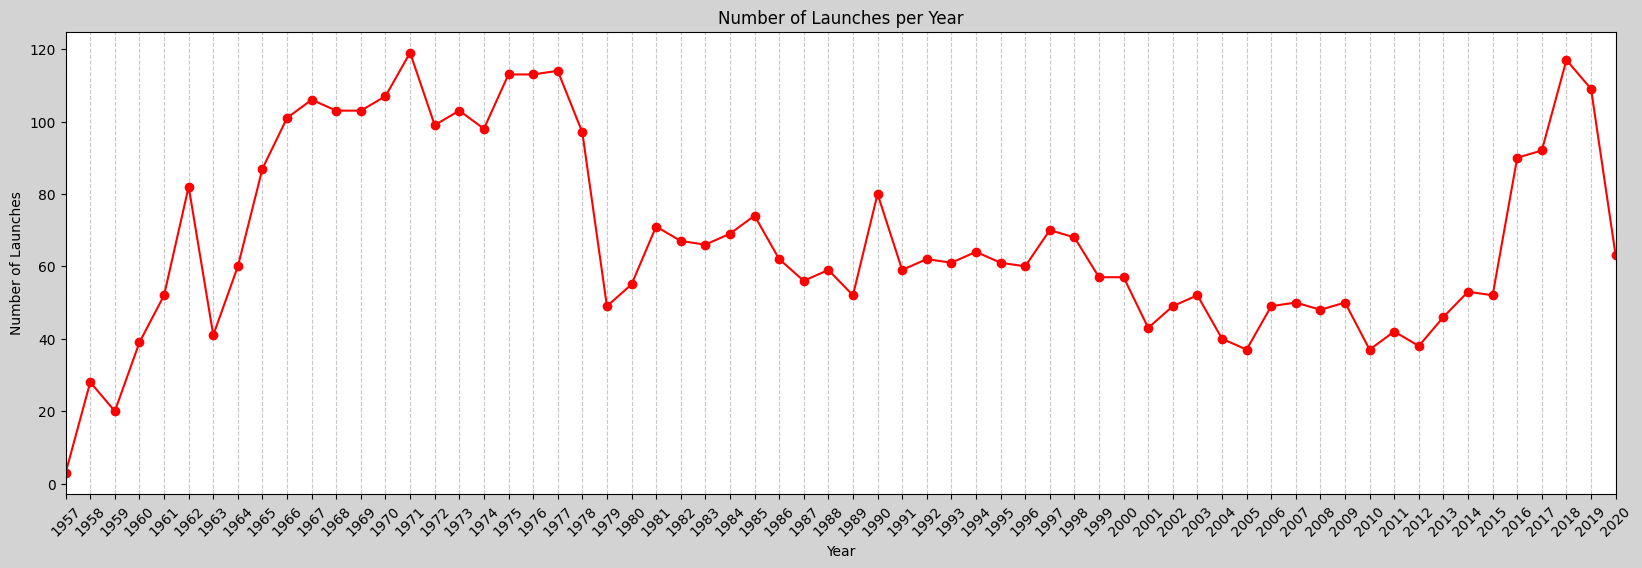

In [ ]:
plt.figure(figsize=(20, 6), facecolor='lightgray')
plt.plot(launches_per_year, marker='o', linestyle='-', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches per Year')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(launches_per_year.index, rotation=45)
plt.margins(x=0)

plt

In [ ]:
# Chart the Number of Launches Month-on-Month until the Present
launches_month_on_month = df_data.groupby('Date').size().reset_index(name='Launch Count')
launches_month_on_month = launches_month_on_month.groupby([launches_month_on_month['Date'].dt.month.rename('Month'), launches_month_on_month['Date'].dt.day.rename('Day')])['Launch Count'].sum().reset_index(name='Launch Count')
launches_month_on_month['Rolling Average'] = launches_month_on_month['Launch Count'].rolling(30).mean()
launches_month_on_month['Year'] = '2020'
launches_month_on_month['Date'] = pd.to_datetime(launches_month_on_month[['Year', 'Month', 'Day']])

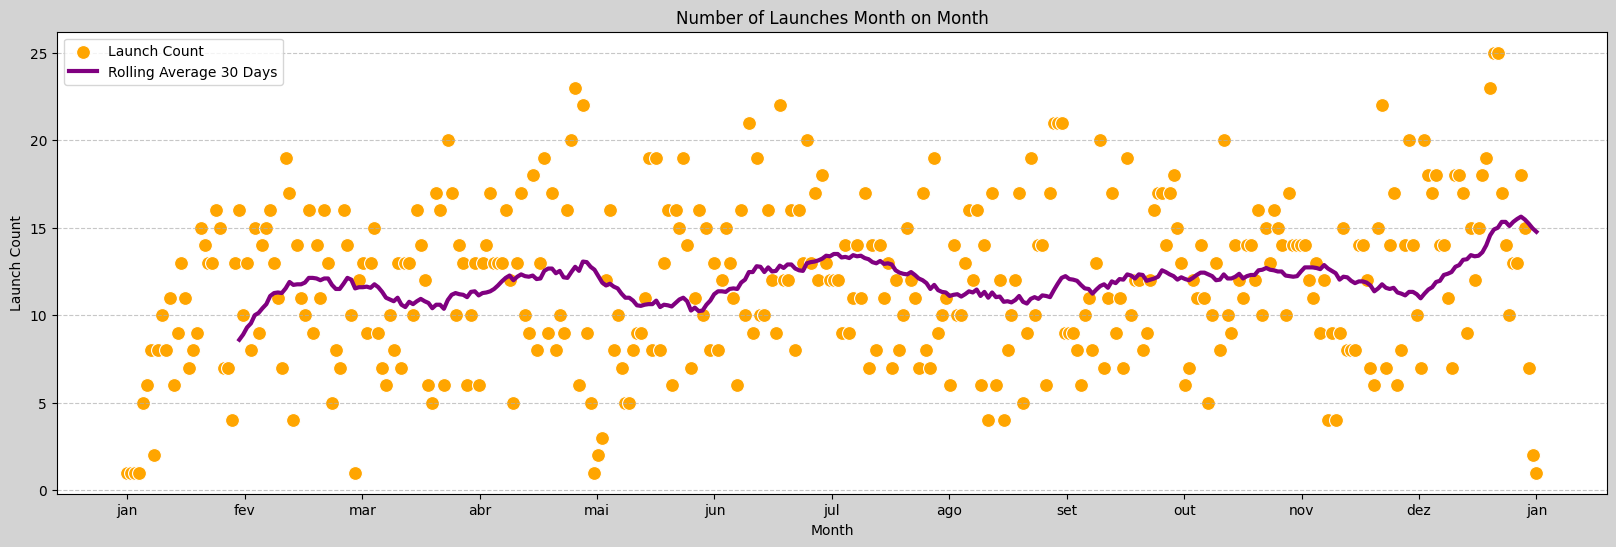

In [ ]:
# Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

min_date = launches_month_on_month['Date'].min()
max_date = launches_month_on_month['Date'].max()
total_days = (max_date - min_date).days
monthly_intervals = [min_date + timedelta(days=total_days/12 * i) for i in range(13)]
month_labels = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez', 'jan']

plt.figure(figsize=(20, 6), facecolor='lightgray')

ax = sns.scatterplot(
      x = 'Date',
			y = 'Launch Count',
			data = launches_month_on_month,
      label = 'Launch Count',
      color = 'orange',
      marker = 'o',
      s = 100
)
sns.lineplot(
      x = 'Date',
			y = 'Rolling Average',
			data = launches_month_on_month,
      label = 'Rolling Average 30 Days',
      color = 'purple',
      linewidth = 3,
)
plt.xlabel('Month')
plt.ylabel('Launch Count')
plt.title('Number of Launches Month on Month')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=monthly_intervals, labels=month_labels)
plt.legend(loc='upper left')

plt.show()

In [ ]:
# Launches per Month: Which months are most popular and least popular for launches?
launches_month_on_month.groupby('Month')['Launch Count'].sum()

Month
1     268
2     336
3     353
4     383
5     326
6     402
7     351
8     373
9     365
10    381
11    336
12    450
Name: Launch Count, dtype: int64

In [ ]:
clean_df['Date'] = pd.to_datetime(df_data['Date'], format="mixed")

<ipython-input-59-4241de452722>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_data['Price'].dtype

dtype('O')

In [ ]:
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

In [ ]:
# Some months have better weather than others. Which time of year seems to be best for space missions?
average_launch_price = df_data.groupby(df_data['Date'].dt.year)['Price'].mean()

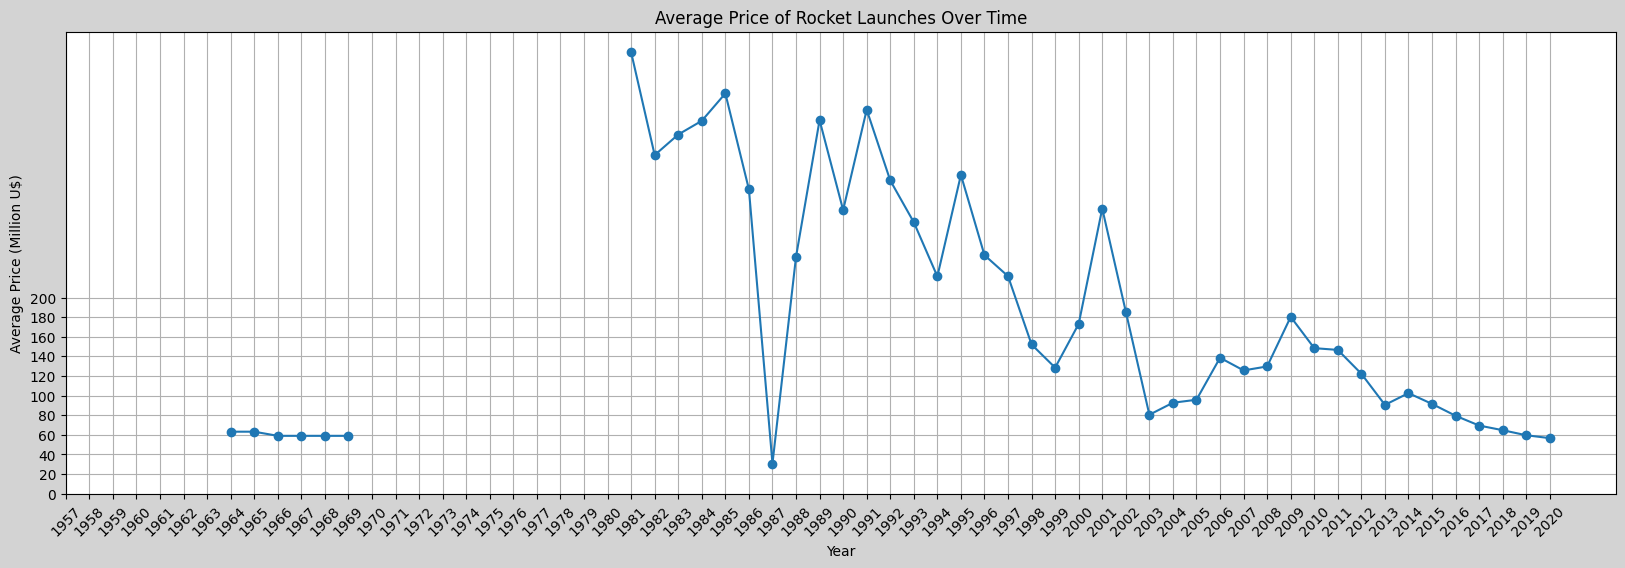

In [ ]:
plt.figure(figsize=(20, 6), facecolor='lightgray')
plt.plot(average_launch_price.index, average_launch_price.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Price (Million U$)')
plt.title('Average Price of Rocket Launches Over Time')
plt.grid(True)
plt.xticks(average_launch_price.index, rotation=45)
plt.yticks(range(0, 201, 20))
plt.show()

In [ ]:
# How has the dominance of launches changed over time between the different players?

launches_top10_organizations = df_data.groupby([df_data['Date'].dt.year.rename('Year'), 'Organisation']).size().reset_index(name='Launch Count')
top10_organizations = launches_top10_organizations.groupby('Organisation')['Launch Count'].sum().sort_values(ascending=False).head(10).reset_index()
launches_top10_organizations = launches_top10_organizations.merge(top10_organizations['Organisation'], on='Organisation', how='inner')

In [ ]:
fig = px.bar(launches_top10_organizations, x="Year", y="Launch Count", color="Organisation")
fig.update_layout(title="Number of Launches over Time by Top 10 Organizations")
fig.show()

In [ ]:
# Cold War Space Race: USA vs USSR

cold_war_update = {
    'Russian Federation': 'USSR',
    'Kazakhstan': 'USSR'
}
df_data.loc[(df_data['Date'].dt.year <= 1991), 'Country'] = df_data['Country'].replace(cold_war_update)

In [ ]:
# The cold war lasted from the start of the dataset up until 1991.
cold_war = df_data[df_data['Date'].dt.year <= 1991]
cold_war_launches = cold_war.groupby([cold_war['Date'].dt.year.rename('Year'), 'Country']).size().reset_index(name='Launch Count')

In [ ]:
# Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.
cold_war_launches_USA_USSR = cold_war_launches.loc[cold_war_launches['Country'].isin(['USA', 'USSR'])]
fig = px.pie(cold_war_launches_USA_USSR, values="Launch Count", names="Country", title='Cold War Space Race Total Rocket Launches')
fig.show()

In [ ]:
## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

fig = px.bar(cold_war_launches_USA_USSR, x="Year", y="Launch Count", color="Country", barmode='group', title='Total Number of Launches Year-On-Year')
fig.update_xaxes(dtick=1)
fig.show()

In [ ]:
## Chart the Total Number of Mission Failures Year on Year.
mission_status_year_on_year = df_data.groupby([df_data['Date'].dt.year.rename('Year'), 'Mission_Status']).size().reset_index(name='Total')
mission_failures_year_on_year = mission_status_year_on_year[mission_status_year_on_year['Mission_Status'] == 'Failure']

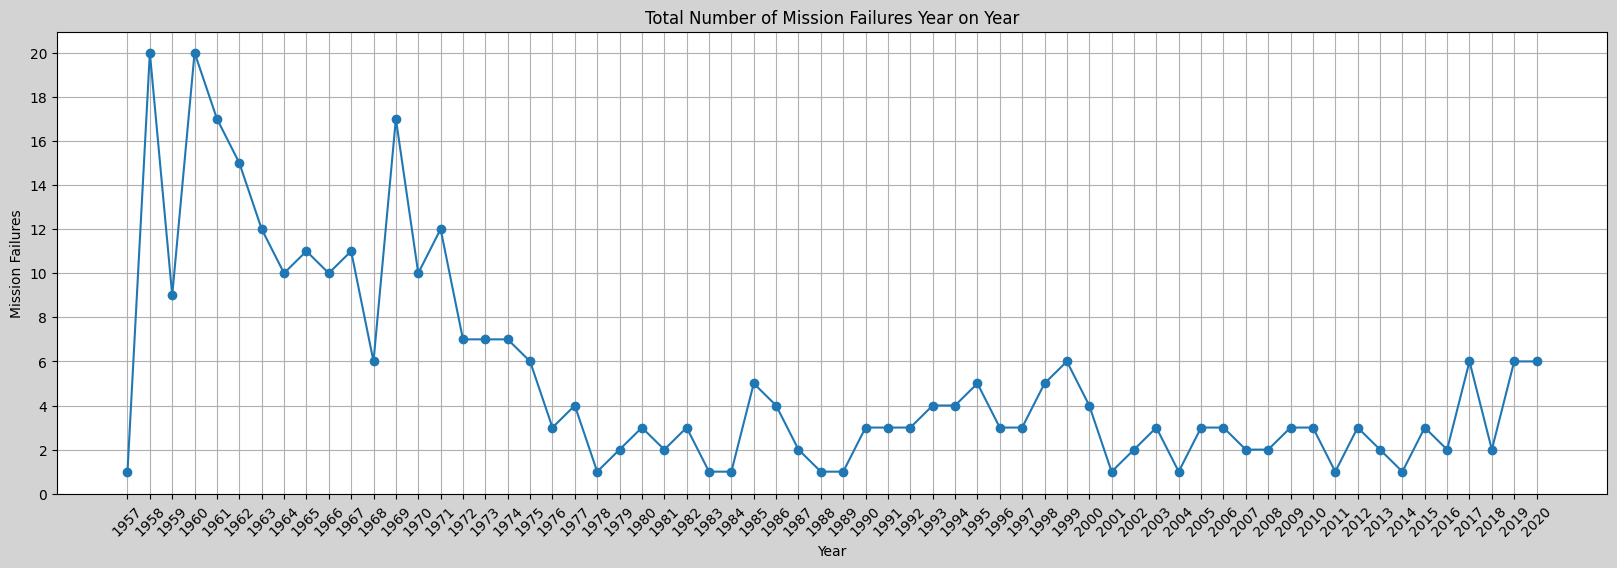

In [ ]:
plt.figure(figsize=(20, 6), facecolor='lightgray')
plt.plot(mission_failures_year_on_year['Year'], mission_failures_year_on_year['Total'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Mission Failures')
plt.title('Total Number of Mission Failures Year on Year')
plt.xticks(mission_failures_year_on_year['Year'], rotation=45)
plt.yticks(range(0, 21, 2))
plt.grid(True)
plt.show()

In [ ]:
## Chart the Percentage of Failures over Time
total_mission_status_year_on_year = mission_status_year_on_year.groupby(['Year'])['Total'].sum().reset_index(name='Total Missions')
mission_failures_year_on_year_percentage = mission_failures_year_on_year.merge(total_mission_status_year_on_year, on='Year')
mission_failures_year_on_year_percentage['Percentage'] = (mission_failures_year_on_year_percentage['Total'] / mission_failures_year_on_year_percentage['Total Missions']) * 100

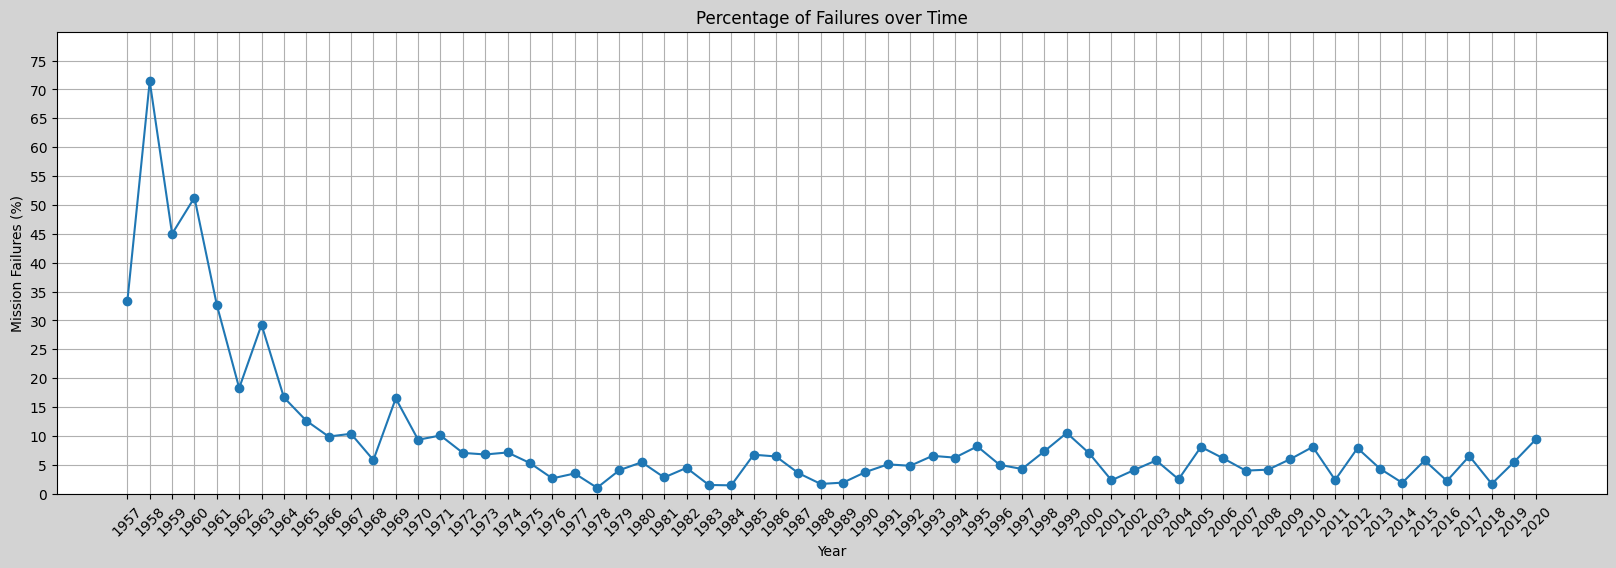

In [ ]:
plt.figure(figsize=(20, 6), facecolor='lightgray')
plt.plot(mission_failures_year_on_year_percentage['Year'], mission_failures_year_on_year_percentage['Percentage'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Mission Failures (%)')
plt.title('Percentage of Failures over Time')
plt.xticks(mission_failures_year_on_year_percentage['Year'], rotation=45)
plt.ylim(0, 80)
plt.yticks(range(0, 80, 5))
plt.grid(True)
plt.show()

In [ ]:
top_country_per_year = df_data.groupby([df_data['Date'].dt.year.rename('Year'), 'Country', 'Mission_Status']).size().reset_index(name='Launch Count')
top_country_launches_per_year = top_country_per_year.groupby(['Year', 'Country'])['Launch Count'].sum().reset_index(name='Launch Count')
top_country_launches_per_year = top_country_launches_per_year.loc[top_country_launches_per_year.groupby('Year')['Launch Count'].idxmax()]

fig = px.bar(top_country_launches_per_year, x="Year", y="Launch Count", color='Country', title='Lead Country in Total Launches')
fig.update_xaxes(dtick=1)
fig.show()

In [ ]:
# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)
top_country_successful_launches_per_year = top_country_per_year[top_country_per_year['Mission_Status'] == 'Success']
top_country_successful_launches_per_year = top_country_successful_launches_per_year.loc[top_country_successful_launches_per_year.groupby('Year')['Launch Count'].idxmax()]

fig = px.bar(top_country_successful_launches_per_year, x="Year", y="Launch Count", color='Country', title='Lead Country in Successful Launches')
fig.update_xaxes(dtick=1)
fig.show()

In [ ]:
# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches
# Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?
organization_lead_launch = df_data.groupby([df_data['Date'].dt.year.rename('Year'), 'Organisation']).size().reset_index(name='Launch Count')
organization_lead_launch = organization_lead_launch.loc[organization_lead_launch.groupby('Year')['Launch Count'].idxmax()]

fig = px.bar(organization_lead_launch, x="Year", y="Launch Count", color='Organisation', title='Lead Organisation in Total Launches')
fig.update_xaxes(dtick=1)
fig.show()